# Setup

In [1]:
!pip install fastai -U 

     |████████████████████████████████| 354 kB 606 kB/s eta 0:00:01
     |████████████████████████████████| 748.8 MB 12 kB/s s eta 0:00:01    |██                              | 46.2 MB 26.8 MB/s eta 0:00:27     |█████████████▎                  | 309.9 MB 42.0 MB/s eta 0:00:11MB/s eta 0:00:04��████████████████████████▉   | 674.7 MB 46.3 MB/s eta 0:00:02
     |████████████████████████████████| 5.9 MB 67.5 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.5.1
    Uninstalling torch-1.5.1:
      Successfully uninstalled torch-1.5.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.6.0a0+35d732a
    Uninstalling torchvision-0.6.0a0+35d732a:
      Successfully uninstalled torchvision-0.6.0a0+35d732a
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: After October 2020 you may experience errors when installing or 

In [2]:
import fastai

In [3]:
fastai.__version__

'2.0.9'

In [5]:
from fastai.tabular.all import *

# Data

In [11]:
path = '../input/titanic'
train_path = path + '/train.csv'
test_path = path + '/test.csv'

In [13]:
train = pd.read_csv(train_path)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train))

In [62]:
data = TabularPandas(
    train,
    procs=[Categorify, FillMissing,Normalize],
    cat_names = ['Pclass', 'SibSp', 'Sex', 'Parch','Cabin','Embarked'],
    cont_names = ['Age','Fare'],
    y_names='Survived',
    splits=splits)

# Train

In [63]:
dls = data.dataloaders(bs=64)

In [72]:
learn = tabular_learner(dls, metrics=accuracy, cbs=ShowGraphCallback())

epoch,train_loss,valid_loss,accuracy,time
0,0.395150,0.377600,0.702247,00:00
1,0.366346,0.382785,0.702247,00:00
2,0.339551,0.371797,0.702247,00:00
3,0.310264,0.345113,0.702247,00:00
4,0.281579,0.310483,0.702247,00:00
5,0.253278,0.269912,0.702247,00:00
6,0.228688,0.222490,0.702247,00:00
7,0.206920,0.168250,0.702247,00:00
8,0.187758,0.142423,0.702247,00:00
9,0.173925,0.139804,0.702247,00:00


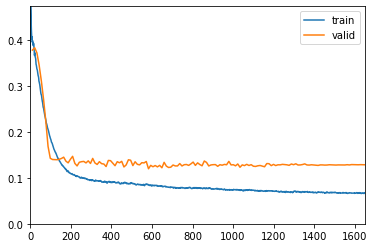

In [73]:
learn.fit_one_cycle(150)

# Test

In [75]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
test = test.fillna(0)

In [87]:
dl = learn.dls.test_dl(test)

In [89]:
result = learn.get_preds(dl=dl)

In [117]:
results = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [118]:
for i, row in test.iterrows():
    pass_id = row['PassengerId']
    pred = learn.predict(row)
    if (pred[1] < 0.5):
        survived = 0
    else:
        survived = 1
    
    results.loc[i] = [pass_id, survived]
        
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [119]:
results.to_csv('preds.csv', index=False)